# Unsupervised Machine Learning

On souhaite réduire la dimensionnalité de notre jeu de données en utilisant une PCA. Ceci pour comprendre quels paramètres comptent le plus dans la prise de décision. On testera d'abord sur le jeu comportant les données des galaxies incertaines, puis on les enlèvera pour voir si cela rend les décisions plus nettes.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lblearn.datasets import load_galaxies
plt.style.use("seaborn-v0_8-darkgrid")

Meaning of the 2 components:
-0.050 x NVOTE + -0.445 x P_EL + 0.227 x P_CW + 0.199 x P_ACW + 0.305 x P_EDGE + -0.098 x P_DK + -0.013 x P_MG + 0.456 x P_CS + -0.440 x P_EL_DEBIASED + 0.452 x P_CS_DEBIASED
0.257 x NVOTE + -0.207 x P_EL + 0.080 x P_CW + -0.013 x P_ACW + -0.153 x P_EDGE + 0.552 x P_DK + 0.718 x P_MG + -0.061 x P_CS + -0.176 x P_EL_DEBIASED + -0.075 x P_CS_DEBIASED


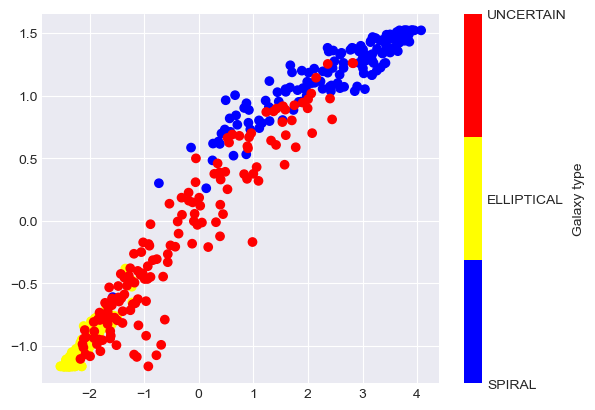

In [90]:
galaxies = load_galaxies(n_samples=150)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(galaxies.data)

# Créer une instance de PCA
pca = PCA(n_components=2)

# Appliquer la PCA sur les données normalisées
X_pca = pca.fit_transform(X_scaled)

# Afficher les deux premières composantes principales
plt.scatter(X_pca[:, 0], X_scaled[:, -1], c=galaxies.target,
           cmap=matplotlib.colormaps.get_cmap(ListedColormap(['blue', 'yellow', 'red'])))
formatter = plt.FuncFormatter(lambda i, *args: galaxies.target_names[int(i)])
plt.colorbar(label='Galaxy type', ticks=[0, 1, 2], format=formatter);

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            galaxies.feature_names)))

Meaning of the 2 components:
-0.047 x NVOTE + -0.446 x P_EL + 0.231 x P_CW + 0.188 x P_ACW + 0.285 x P_EDGE + -0.177 x P_DK + 0.032 x P_MG + 0.450 x P_CS + -0.441 x P_EL_DEBIASED + 0.446 x P_CS_DEBIASED
0.184 x NVOTE + -0.039 x P_EL + 0.540 x P_CW + 0.069 x P_ACW + -0.539 x P_EDGE + -0.109 x P_DK + 0.601 x P_MG + 0.022 x P_CS + 0.041 x P_EL_DEBIASED + -0.051 x P_CS_DEBIASED


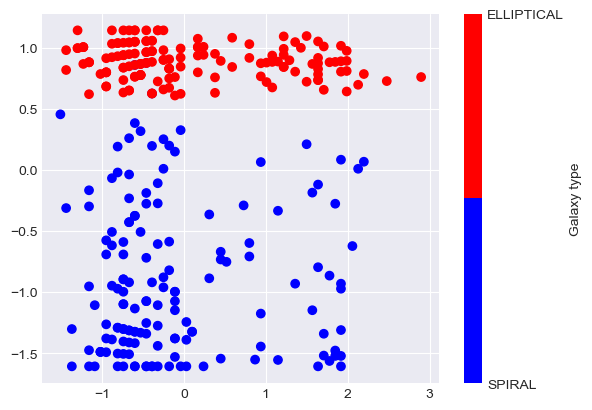

In [97]:
galaxies = load_galaxies(n_samples=150)

X, y = galaxies.data, galaxies.target
idx_non_uncertain = np.where(y != 2)
X = X[idx_non_uncertain, :].reshape(300, 10)
y = y[idx_non_uncertain]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer une instance de PCA
pca = PCA(n_components=2)

# Appliquer la PCA sur les données normalisées
X_pca = pca.fit_transform(X_scaled)

# Afficher les deux premières composantes principales
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=matplotlib.colormaps.get_cmap(ListedColormap(['blue', 'red'])))

formatter = plt.FuncFormatter(lambda i, *args: galaxies.target_names[int(i)])
plt.colorbar(label='Galaxy type', ticks=[0, 1], format=formatter);

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            galaxies.feature_names)))

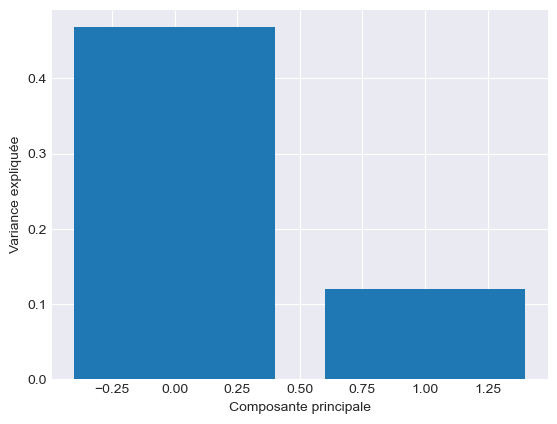

In [91]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée');

In [48]:
component_1 = pca.components_[0]
component_2 = pca.components_[1]

most_important_vars_1 = np.abs(component_1).argsort()[::-1][:5]
most_important_vars_2 = np.abs(component_2).argsort()[::-1][:5]

print("Les 5 variables les plus importantes pour la composante 1 sont:")
print(np.array(galaxies.feature_names)[most_important_vars_1])

print("Les 5 variables les plus importantes pour la composante 2 sont:")
print(np.array(galaxies.feature_names)[most_important_vars_2])

Les 5 variables les plus importantes pour la composante 1 sont:
['P_CS' 'P_EL' 'P_CS_DEBIASED' 'P_EL_DEBIASED' 'P_EDGE']
Les 5 variables les plus importantes pour la composante 2 sont:
['P_MG' 'P_CW' 'P_EDGE' 'NVOTE' 'P_DK']


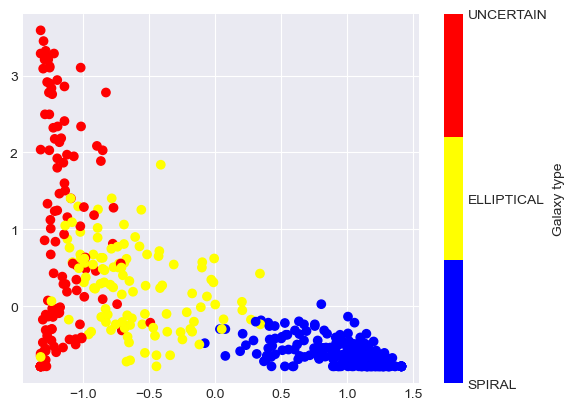

In [96]:
from sklearn.cluster import KMeans

galaxies = load_galaxies(n_samples=150)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(galaxies.data)

k_means = KMeans(n_clusters=3, random_state=0, n_init='auto') # Fixing the RNG in kmeans
k_means.fit(X_scaled)
y_pred = k_means.predict(X_scaled)

plt.scatter(X_scaled[:, 8], X_scaled[:, 4], c=y_pred, cmap=matplotlib.colormaps.get_cmap(ListedColormap(['blue', 'yellow', 'red'])))
formatter = plt.FuncFormatter(lambda i, *args: galaxies.target_names[int(i)])
plt.colorbar(label='Galaxy type', ticks=[0, 1, 2], format=formatter);

In [56]:
X_scaled.shape

(450, 10)